# Import libraries 

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Loading dataset

In [125]:
# Load the dataset
netflix_data = pd.read_csv('/Users/lilianngonadi/Downloads/netflix_titles.csv')

# Handle missing values and Encode categorical variables 

In [126]:
# Handle missing values
netflix_data.fillna('', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['type', 'country', 'rating']:
    le = LabelEncoder()
    netflix_data[column] = le.fit_transform(netflix_data[column])
    label_encoders[column] = le

# Display the first few rows of the processed dataset
netflix_data.head(400)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,,604,"September 25, 2021",2020,8,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",427,"September 24, 2021",2021,12,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,12,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,,,0,"September 24, 2021",2021,12,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",252,"September 24, 2021",2021,12,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
395,s396,0,Bankrolled,Marcos Bucay,"Aldo Escalante, Ricardo Polanco, Natalia Télle...",0,"July 23, 2021",2021,12,97 min,"Comedies, International Movies",Two directionless millennial bros get high and...
396,s397,0,Blood Red Sky,Peter Thorwarth,"Peri Baumeister, Alexander Scheer, Kais Setti,...",0,"July 23, 2021",2021,12,123 min,"Action & Adventure, Horror Movies, Internation...",When a group of terrorists hijacks an overnigh...
397,s398,1,Feels Like Ishq,,"Radhika Madan, Amol Parashar, Rohit Saraf, Kaj...",0,"July 23, 2021",2021,12,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Short films follow young adults as they naviga...
398,s399,0,Kingdom: Ashin of the North,Kim Seong-hun,"Gianna Jun, Park Byung-eun, Kim Si-a, Kim Roi-...",0,"July 23, 2021",2021,12,94 min,"Horror Movies, International Movies, Thrillers","Tragedy, betrayal and a mysterious discovery f..."


# Distribution of Content Types

Text(0, 0.5, 'Count')

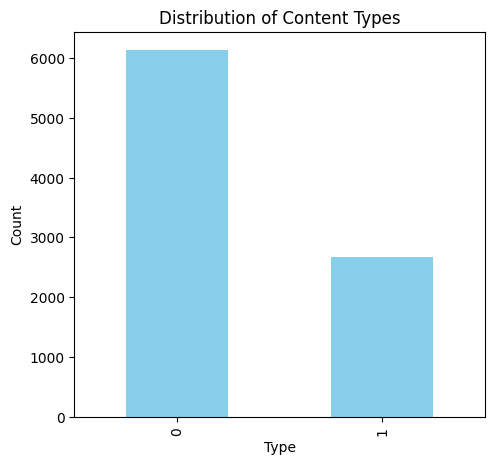

In [127]:
# Distribution of Content Types
content_type_distribution = netflix_data['type'].value_counts()
# Plotting the distributions
plt.figure(figsize=(18, 5))
# Plot for Content Types
plt.subplot(1, 3, 1)
content_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')



# Country Distribution

Text(0, 0.5, 'Count')

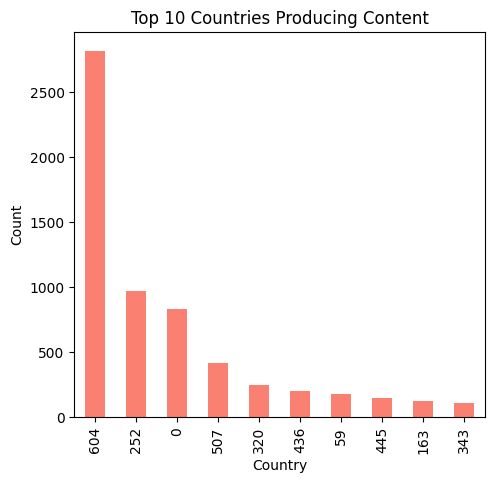

In [128]:
# Country Distribution
country_distribution = netflix_data['country'].value_counts().head(10)  # Top 10 countries
# Plotting the distributions
plt.figure(figsize=(18, 5))
# Plot for Country Distribution
plt.subplot(1, 3, 2)
country_distribution.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Count')

# Genre Analysis

/var/folders/yp/c5rk54f5231bjlww9_pb2km40000gn/T/ipykernel_2610/3109608012.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  genres_split = netflix_data['listed_in'].str.split(',').apply(pd.Series, 1).stack()


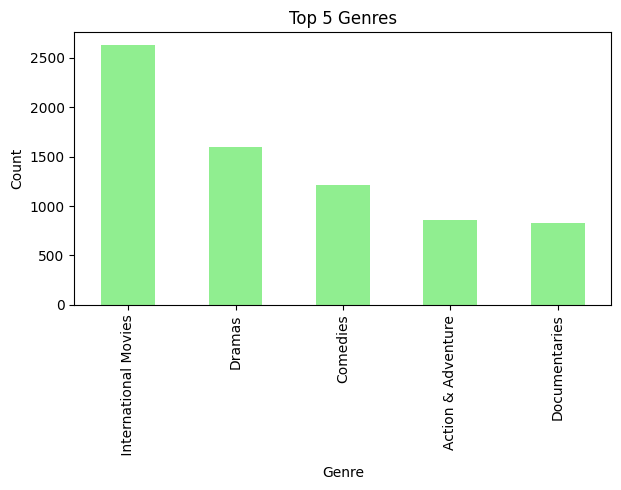

In [129]:
# Genre Analysis
# Split the genres and explode the dataframe to get each genre in a separate row
genres_split = netflix_data['listed_in'].str.split(',').apply(pd.Series, 1).stack()
genres_split.index = genres_split.index.droplevel(-1)
genres_split.name = 'genre'
genre_distribution = genres_split.value_counts().head(5)  # Top 10 genres

# Plotting the distributions
plt.figure(figsize=(18, 5))
# Plot for Genre Distribution
plt.subplot(1, 3, 3)
genre_distribution.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#  Directors analysis

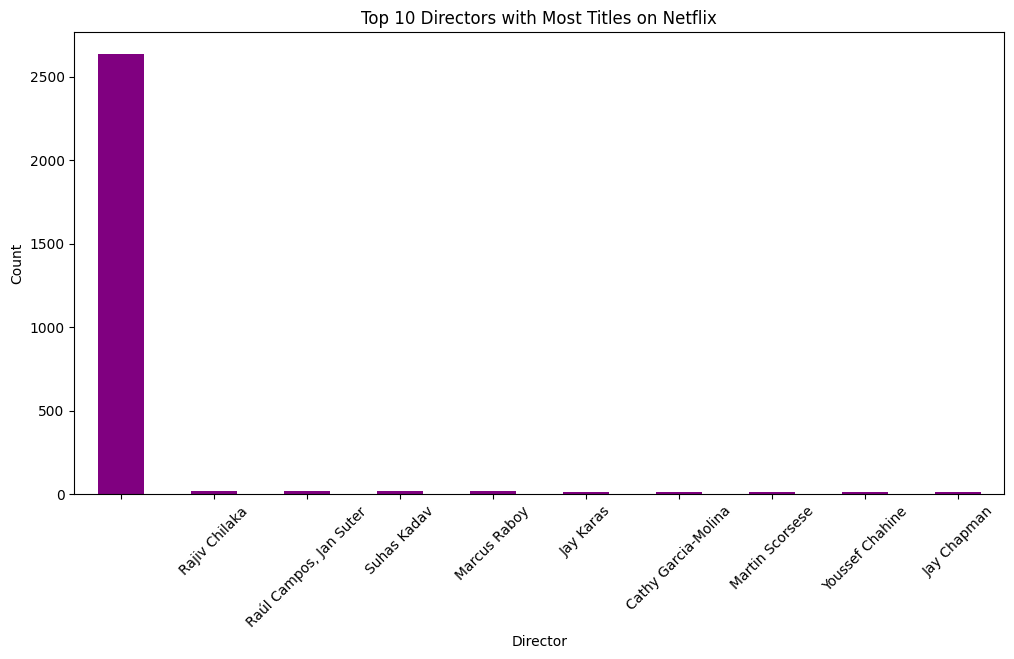

In [130]:
# Count the occurrences of each director
director_counts = netflix_data['director'].value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(12, 6))
director_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis

In [131]:
# Handle missing descriptions by assigning the result directly to the column
netflix_data['description'] = netflix_data['description'].fillna('')

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
netflix_data['sentiment'] = netflix_data['description'].apply(get_sentiment)


# Categorizing Sentiments and Plotting Distribution

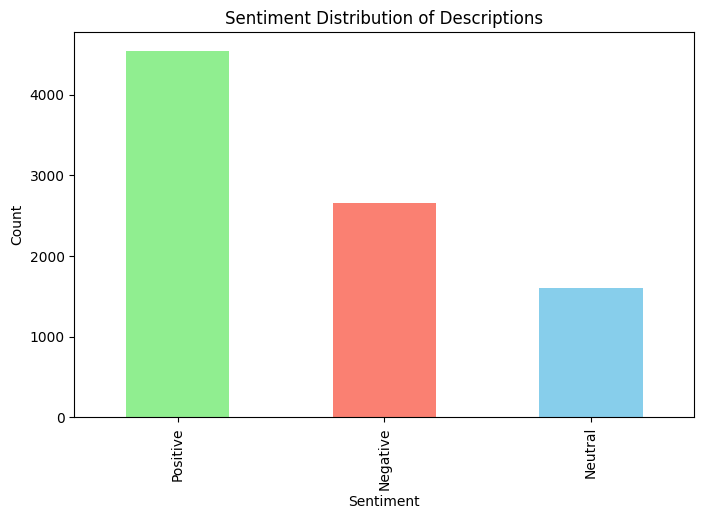

In [132]:
# Categorize sentiments
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

netflix_data['sentiment_category'] = netflix_data['sentiment'].apply(categorize_sentiment)

# Plotting the sentiment distribution
sentiment_distribution = netflix_data['sentiment_category'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['lightgreen', 'salmon', 'skyblue'])
plt.title('Sentiment Distribution of Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# sentiment distribution by release year

<Figure size 1200x800 with 0 Axes>

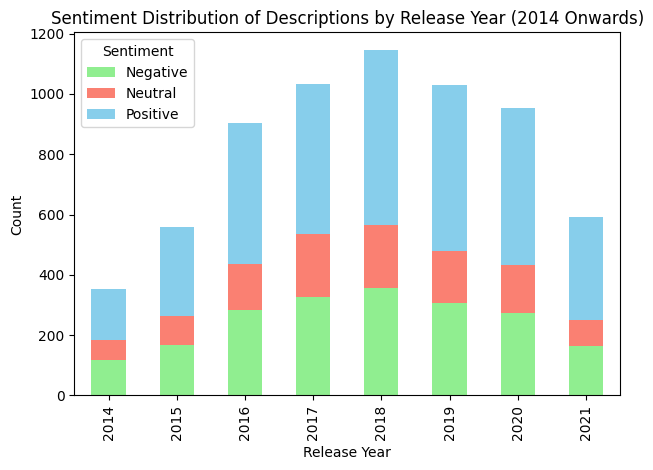

In [133]:
# Filter data from 2014 onwards
netflix_data = netflix_data[netflix_data['release_year'] >= 2014]

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
netflix_data['sentiment'] = netflix_data['description'].apply(get_sentiment)

# Categorize sentiments
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

netflix_data['sentiment_category'] = netflix_data['sentiment'].apply(categorize_sentiment)

# Group by release year and sentiment category
sentiment_by_year = netflix_data.groupby(['release_year', 'sentiment_category']).size().unstack().fillna(0)

# Plotting the sentiment distribution by release year
plt.figure(figsize=(12, 8))
sentiment_by_year.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon', 'skyblue'])
plt.title('Sentiment Distribution of Descriptions by Release Year (2014 Onwards)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [134]:
# Load the dataset
df = pd.read_csv('/Users/lilianngonadi/Downloads/netflix_titles.csv')

# Handle missing values
df.fillna('Unknown', inplace=True)  # Filling missing values with 'Unknown'

# Select features for clustering
# For demonstration, let's use 'release_year' and 'duration' if they exist
features = ['release_year', 'duration']

# Ensure these columns exist in the dataset
df = df[[col for col in features if col in df.columns]]

# Convert categorical duration to numerical if needed
if 'duration' in df.columns and df['duration'].dtype == 'object':
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Drop rows with NaN values in the selected features
df.dropna(subset=features, inplace=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/var/folders/yp/c5rk54f5231bjlww9_pb2km40000gn/T/ipykernel_2610/2859957867.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


## Clustering and Visualization

# Elbow Method

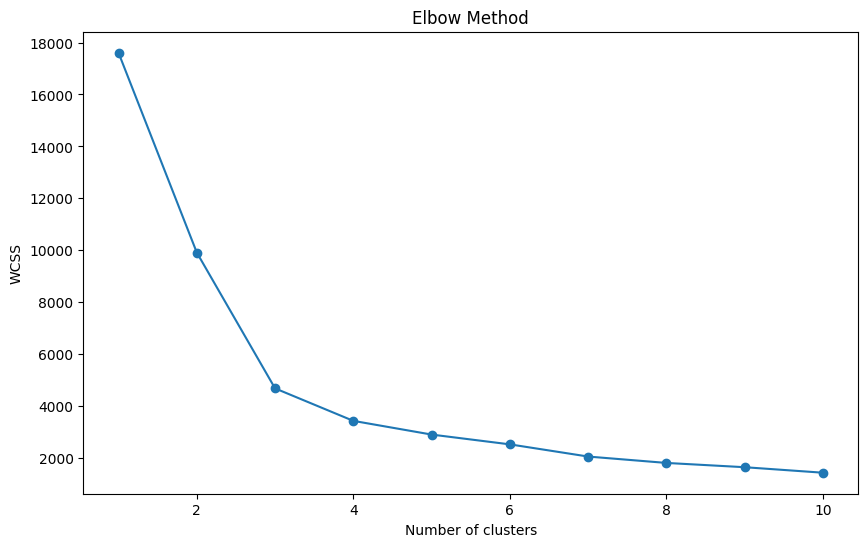

In [135]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [136]:
# Silhouette Score

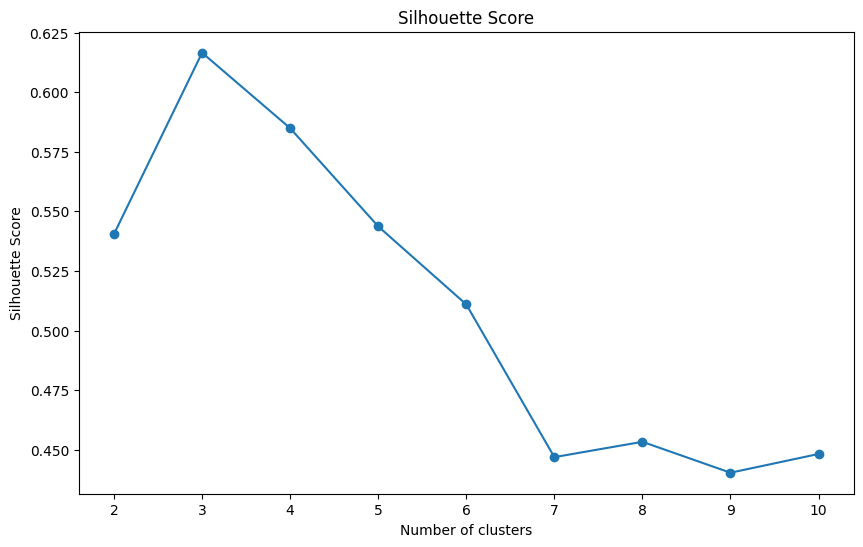

In [137]:
# Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters and perform clustering

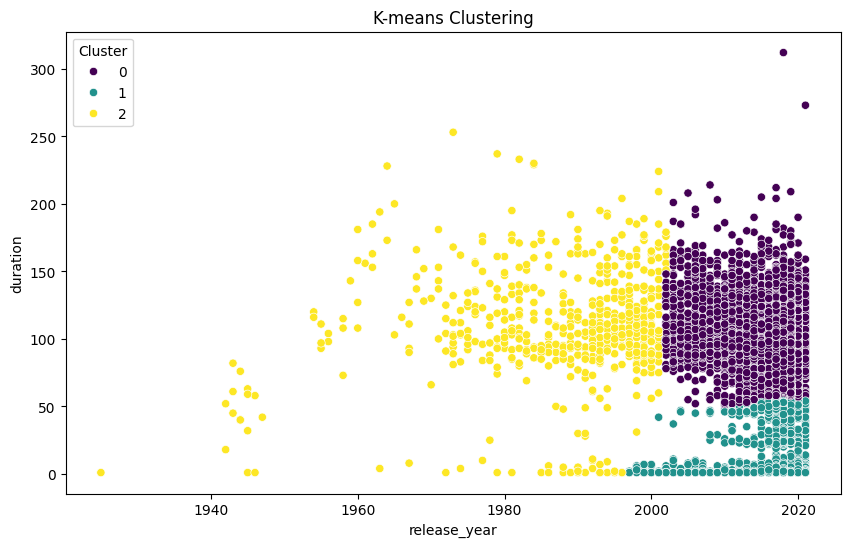

   release_year  duration  cluster
0          2020      90.0        0
1          2021       2.0        1
2          2021       1.0        1
3          2021       1.0        1
4          2021       2.0        1


In [138]:
# Choose the optimal number of clusters (e.g., 3) and perform clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters if there are only two features
if len(features) == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['cluster'], palette='viridis')
    plt.title('K-means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()
else:
    print("Clustering performed. Consider dimensionality reduction for visualization if there are more than two features.")

# Display the first few rows of the dataframe with cluster labels
print(df.head())


# PCA components visualization

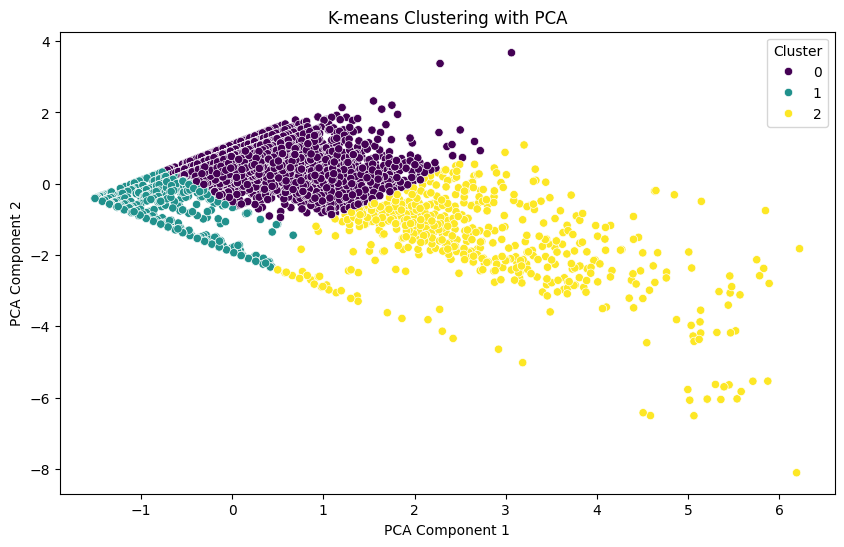

   release_year  duration  cluster      pca1      pca2
0          2020      90.0        0 -0.186112  0.747020
1          2021       2.0        1 -1.490903 -0.397432
2          2021       1.0        1 -1.504819 -0.411349
3          2021       1.0        1 -1.504819 -0.411349
4          2021       2.0        1 -1.490903 -0.397432


In [139]:
# Add PCA components to the dataframe for visualization
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['cluster'], palette='viridis')
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the first few rows of the dataframe with cluster labels
print(df.head())

In [140]:
# Save the clustered data to a new CSV file
df.to_csv('/Users/lilianngonadi/Downloads/netflix_titles_clustered.csv', index=False)

# summary statistics for each cluster

In [141]:
# Display summary statistics for each cluster
cluster_summary = df.groupby('cluster').agg({
    'release_year': ['mean', 'median', 'min', 'max'],
    'duration': ['mean', 'median', 'min', 'max'],
    'pca1': ['mean', 'median', 'min', 'max'],
    'pca2': ['mean', 'median', 'min', 'max']
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)



Cluster Summary Statistics:
  cluster release_year                        duration                      \
                  mean  median   min   max        mean median   min    max   
0       0  2015.524665  2017.0  2002  2021  101.943595   99.0  51.0  312.0   
1       1  2017.054625  2018.0  1997  2021    5.824062    1.0   1.0   55.0   
2       2  1987.725424  1992.0  1925  2002  109.132203  105.5   1.0  253.0   

       pca1                                    pca2                      \
       mean    median       min       max      mean    median       min   
0  0.338882  0.235307 -0.711598  3.063613  0.554443  0.572764 -0.942588   
1 -1.121388 -1.236478 -1.504819  0.669133 -0.660515 -0.624025 -2.335417   
2  2.667572  2.421815  0.499419  6.223810 -1.574171 -1.322111 -8.107622   

             
        max  
0  3.676067  
1  0.340124  
2  1.088563  


# Visualize the distribution of release year within each cluster using histogram

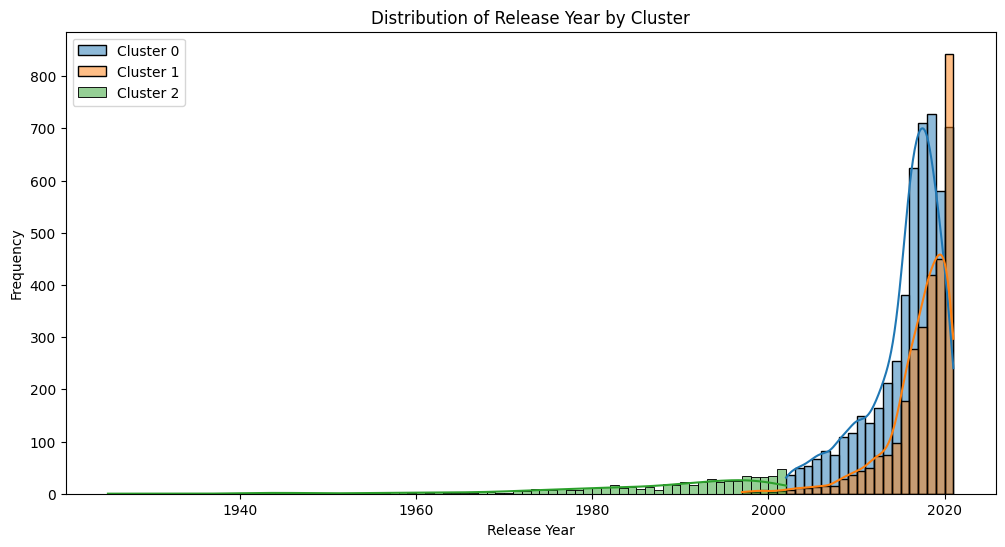

In [142]:
# Visualize the distribution of release year within each cluster using histogram
plt.figure(figsize=(12, 6))
for cluster in df['cluster'].unique():
    sns.histplot(df[df['cluster'] == cluster]['release_year'], kde=True, label=f'Cluster {cluster}', binwidth=1)
plt.title('Distribution of Release Year by Cluster')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the distribution of release year within each cluster using violin plot

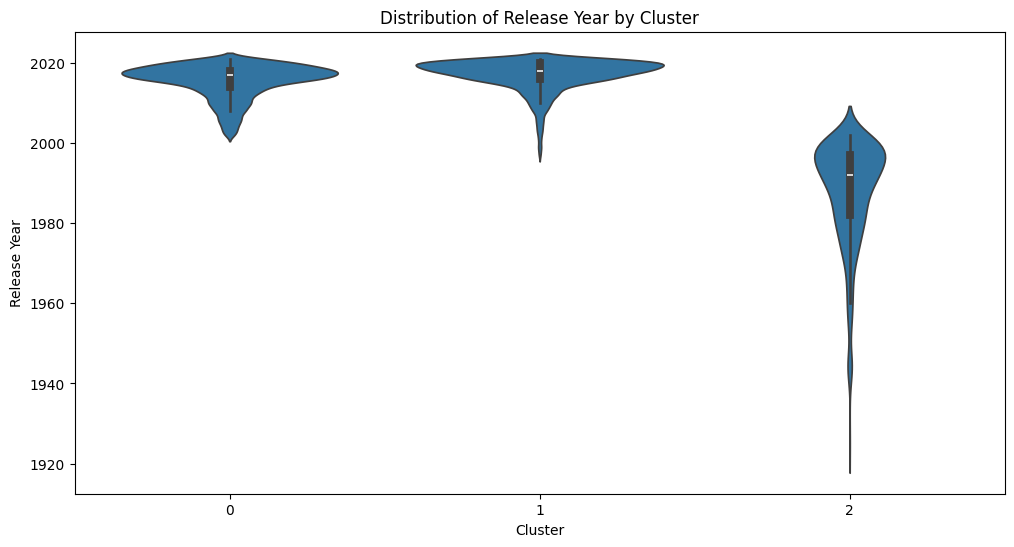

In [143]:
# Visualize the distribution of release year within each cluster using violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='cluster', y='release_year', data=df)
plt.title('Distribution of Release Year by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Release Year')
plt.show()
